### Import all necessary libraries

In [1]:
!pip install keras_preprocessing
# pip install keras
# pip install tensorflow

     ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D, MaxPool2D,Flatten
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications import ResNet152V2

In [2]:
img=load_img(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\train\क\5_क.jpg")

In [3]:
type(img)

PIL.Image.Image

In [4]:
img=img_to_array(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


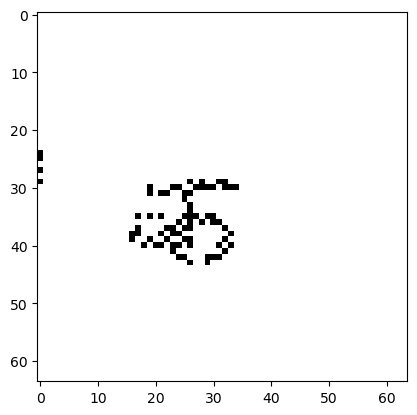

In [5]:
plt.imshow(img)

In [6]:
img.shape

(64, 64, 3)

### Build the CNN model

In [16]:
model=Sequential()

model.add(Conv2D(32, input_shape=(64,64,3), kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(513,activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

### Visualize the model

In [18]:
plot_model(model, show_dtype=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Compile the model

In [19]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

### Import the dataset

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datsgen=ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [21]:
test_datsgen=ImageDataGenerator(rescale=1/255,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [22]:
training_set=train_datsgen.flow_from_directory(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\train",
                                              target_size=(224, 224),
                                              class_mode='categorical')

Found 22258 images belonging to 513 classes.


In [23]:
test_set=train_datsgen.flow_from_directory(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\val",
                                              target_size=(224, 224),
                                              class_mode='categorical')

Found 6022 images belonging to 513 classes.


### Train the model

In [25]:
model.fit(training_set, epochs=100)

Epoch 1/100
696/696 [==============================] - 255s 365ms/step - loss: 6.2172 - accuracy: 0.0034
Epoch 2/100
696/696 [==============================] - 68s 98ms/step - loss: 5.4054 - accuracy: 0.0509
Epoch 3/100
696/696 [==============================] - 68s 97ms/step - loss: 4.0653 - accuracy: 0.1917
Epoch 4/100
696/696 [==============================] - 68s 97ms/step - loss: 3.0250 - accuracy: 0.3488
Epoch 5/100
696/696 [==============================] - 68s 97ms/step - loss: 2.3113 - accuracy: 0.4832
Epoch 6/100
696/696 [==============================] - 69s 99ms/step - loss: 1.8226 - accuracy: 0.5737
Epoch 7/100
696/696 [==============================] - 68s 97ms/step - loss: 1.4595 - accuracy: 0.6503
Epoch 8/100
696/696 [==============================] - 68s 98ms/step - loss: 1.2315 - accuracy: 0.6954
Epoch 9/100
696/696 [==============================] - 68s 97ms/step - loss: 1.0366 - accuracy: 0.7341
Epoch 10/100
696/696 [==============================] - 67s 96ms/step -

### Evaluate on unseen data

In [26]:
model.evaluate(test_set)

189/189 [==============================] - 40s 211ms/step - loss: 1.3656 - accuracy: 0.8401


[1.3655879497528076, 0.8400863409042358]

### Transfer Learning

In [47]:
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Create a DenseNet121 base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the pre-trained DenseNet121 model
model.add(base_model)

# Add Global Average Pooling 2D layer
model.add(GlobalAveragePooling2D())

# Add your own classifier on top
model.add(Dense(512, activation='relu'))
model.add(Dense(513, activation='softmax'))

# Summary of the model
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# Use data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)

# No data augmentation for validation/test
test_datagen = ImageDataGenerator(rescale=1/255)

# Set the batch size
batch_size = 32

# Load and augment the training data
training_set = train_datagen.flow_from_directory(
    r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\train",
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical')

# Load the validation data
test_set = test_datagen.flow_from_directory(
    r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\val",
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical')

# Train the model
model.fit(training_set, epochs=50, validation_data=test_set)

# Evaluate on unseen data
model.evaluate(test_set)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_38 (Dense)            (None, 512)               524800    
                                                                 
 dense_39 (Dense)            (None, 513)               263169    
                                                                 
Total params: 7825473 (29.85 MB)
Trainable params: 787969 (3.01 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


Found 22258 images belonging to 513 classes.
Found 6022 images belonging to 513 classes.
Epoch 1/50
696/696 [==============================] - 212s 299ms/step - loss: 5.8228 - accuracy: 0.0136 - val_loss: 5.1764 - val_accuracy: 0.0382
Epoch 2/50
696/696 [==============================] - 215s 309ms/step - loss: 5.0143 - accuracy: 0.0466 - val_loss: 4.6737 - val_accuracy: 0.0676
Epoch 3/50
696/696 [==============================] - 216s 310ms/step - loss: 4.6934 - accuracy: 0.0731 - val_loss: 4.4597 - val_accuracy: 0.0844
Epoch 4/50
669/696 [===========================>..] - ETA: 6s - loss: 4.4916 - accuracy: 0.0868

KeyboardInterrupt: 

In [43]:
# Load the ResNet152V2 model pre-trained on ImageNet data
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the convolutional layers of the ResNet152V2 model
for layer in base_model.layers:
    layer.trainable = False

In [4]:
model = Sequential()

# Add the ResNet152V2 base model
model.add(base_model)

# Add your own layers on top of the ResNet152V2 model with 'SAME' padding
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(513, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2, 2, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 32)          589856    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32)                0

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [14]:
# Load and preprocess the data using ImageDataGenerators
training_set = train_datagen.flow_from_directory(
    r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\train",
    target_size=(64, 64),
    class_mode='categorical'
)

Found 22258 images belonging to 513 classes.


In [15]:
test_set = test_datagen.flow_from_directory(
    r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\val",
    target_size=(64, 64),
    class_mode='categorical'
)

Found 6022 images belonging to 513 classes.


In [12]:
# Train the model
model.fit(training_set, epochs=5)

Epoch 1/5
696/696 [==============================] - 263s 378ms/step - loss: 2.4362 - accuracy: 0.3997
Epoch 2/5
696/696 [==============================] - 272s 390ms/step - loss: 2.4012 - accuracy: 0.4059
Epoch 3/5
696/696 [==============================] - 272s 391ms/step - loss: 2.4107 - accuracy: 0.4028
Epoch 4/5
696/696 [==============================] - 279s 401ms/step - loss: 2.3884 - accuracy: 0.4100
Epoch 5/5
696/696 [==============================] - 275s 394ms/step - loss: 2.3834 - accuracy: 0.4104


In [13]:
model.evaluate(test_set)

189/189 [==============================] - 66s 349ms/step - loss: 2.7719 - accuracy: 0.3404


[2.7718911170959473, 0.3404184579849243]

In [ ]:
# Load and preprocess a test image
test_image = load_img(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\val\र्व\1_र्व.jpg", target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get class indices
indices = training_set.class_indices

# Make predictions
result = np.argmax(model.predict(test_image, verbose=False))
print(list(indices.keys())[list(indices.values()).index(result)])

### Prediction on sample data

In [37]:
test_image=load_img(r"C:\Users\sndes\JupyterProjects\FinalProject\Fin_DS\val\र्व\1_र्व.jpg",target_size=(64,64))

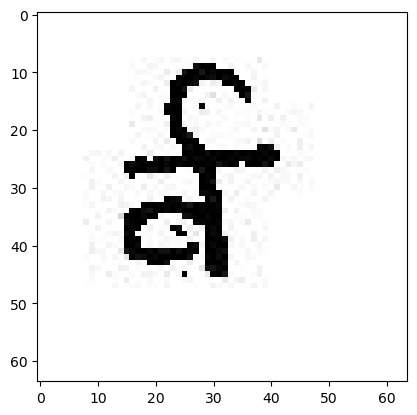

In [38]:
plt.imshow(test_image)

In [39]:
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)

In [40]:
test_image.shape

(1, 64, 64, 3)

In [41]:
training_set.class_indices

{'अ': 0,
 'अं': 1,
 'अः': 2,
 'आ': 3,
 'इ': 4,
 'ई': 5,
 'उ': 6,
 'ऊ': 7,
 'ऋ': 8,
 'ए': 9,
 'ऐ': 10,
 'ओ': 11,
 'औ': 12,
 'क': 13,
 'कं': 14,
 'कः': 15,
 'का': 16,
 'की': 17,
 'कु': 18,
 'कू': 19,
 'के': 20,
 'कै': 21,
 'को': 22,
 'कौ': 23,
 'क्क': 24,
 'क्त': 25,
 'क्र': 26,
 'क्ल': 27,
 'क्ल्य': 28,
 'क्ष': 29,
 'क्षं_': 30,
 'क्षः': 31,
 'क्षा_': 32,
 'क्षि_': 33,
 'क्षी_': 34,
 'क्षु_': 35,
 'क्षू_': 36,
 'क्षे_': 37,
 'क्षै_': 38,
 'क्षो_': 39,
 'क्षौ_': 40,
 'क्ष्य': 41,
 'ख': 42,
 'खं': 43,
 'खः': 44,
 'खा': 45,
 'खि': 46,
 'खी': 47,
 'खु': 48,
 'खू': 49,
 'खे': 50,
 'खै': 51,
 'खो': 52,
 'खौ': 53,
 'ख्य': 54,
 'ग': 55,
 'गं': 56,
 'गः': 57,
 'गा': 58,
 'गि': 59,
 'गी': 60,
 'गु': 61,
 'गू': 62,
 'गे': 63,
 'गै': 64,
 'गो': 65,
 'गौ': 66,
 'ग्ग': 67,
 'ग्य': 68,
 'ग्र': 69,
 'ग्ल': 70,
 'घ': 71,
 'घं': 72,
 'घः': 73,
 'घा': 74,
 'घि': 75,
 'घी': 76,
 'घु': 77,
 'घू': 78,
 'घे': 79,
 'घै': 80,
 'घो': 81,
 'घौ': 82,
 'ङ': 83,
 'च': 84,
 'चं': 85,
 'चः': 86,
 'चा': 87,
 'चि': 88,


In [42]:
indices = training_set.class_indices

In [43]:
result = np.argmax(model.predict(test_image,verbose=False))
print(list(indices.keys())[list(indices.values()).index(result)])

ढी
